# <b>Assignment : DT</b>

<font color='red'><b> Please check below video before attempting this assignment</b></font>

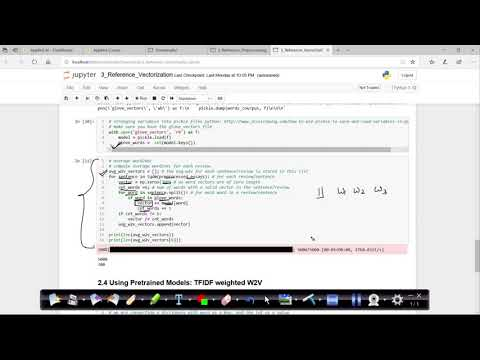

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('ZhLXULFjIjQ', width="1000",height="500")

<font color='red'><b> TF-IDFW2V</b></font>

<b>Tfidf w2v (w1,w2..) = (tfidf(w1) * w2v(w1) + tfidf(w2) * w2v(w2) + …)  /    (tfidf(w1) + tfidf(w2) + …)</b>

<b>(Optional) Please check course video on [AVgw2V and TF-IDFW2V ](https://www.appliedaicourse.com/lecture/11/applied-machine-learning-online-course/2916/avg-word2vec-tf-idf-weighted-word2vec/3/module-3-foundations-of-natural-language-processing-and-machine-learning)for more details.

<font color='blue'><b>Glove vectors </b></font>

<b>In this assignment you will be working with glove vectors , please check  [this](https://en.wikipedia.org/wiki/GloVe_(machine_learning)) and [this](https://en.wikipedia.org/wiki/GloVe_(machine_learning)) for more details.</b><br>

Download glove vectors from this [link ](https://drive.google.com/file/d/1lDca_ge-GYO0iQ6_XDLWePQFMdAA2b8f/view?usp=sharing)

In [2]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/

import pickle
from tqdm import tqdm
import os
from chart_studio.plotly import plotly
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
from collections import Counter

#please use below code to load glove vectors 
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

or else , you can use below code

In [3]:
'''
# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039
def loadGloveModel(gloveFile):
    print ("Loading Glove Model")
    f = open(gloveFile,'r', encoding="utf8")
    model = {}
    for line in tqdm(f):
        splitLine = line.split()
        word = splitLine[0]
        embedding = np.array([float(val) for val in splitLine[1:]])
        model[word] = embedding
    print ("Done.",len(model)," words loaded!")
    return model
model = loadGloveModel('glove.42B.300d.txt')

# ============================
Output:
    
Loading Glove Model
1917495it [06:32, 4879.69it/s]
Done. 1917495  words loaded!

# ============================

words = []
for i in preproced_texts:
    words.extend(i.split(' '))

for i in preproced_titles:
    words.extend(i.split(' '))
print("all the words in the coupus", len(words))
words = set(words)
print("the unique words in the coupus", len(words))

inter_words = set(model.keys()).intersection(words)
print("The number of words that are present in both glove vectors and our coupus", \
      len(inter_words),"(",np.round(len(inter_words)/len(words)*100,3),"%)")

words_courpus = {}
words_glove = set(model.keys())
for i in words:
    if i in words_glove:
        words_courpus[i] = model[i]
print("word 2 vec length", len(words_courpus))


# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/

import pickle
with open('glove_vectors', 'wb') as f:
    pickle.dump(words_courpus, f)


'''

'\n# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039\ndef loadGloveModel(gloveFile):\n    print ("Loading Glove Model")\n    f = open(gloveFile,\'r\', encoding="utf8")\n    model = {}\n    for line in tqdm(f):\n        splitLine = line.split()\n        word = splitLine[0]\n        embedding = np.array([float(val) for val in splitLine[1:]])\n        model[word] = embedding\n    print ("Done.",len(model)," words loaded!")\n    return model\nmodel = loadGloveModel(\'glove.42B.300d.txt\')\n\n# ============================\nOutput:\n    \nLoading Glove Model\n1917495it [06:32, 4879.69it/s]\nDone. 1917495  words loaded!\n\n# ============================\n\nwords = []\nfor i in preproced_texts:\n    words.extend(i.split(\' \'))\n\nfor i in preproced_titles:\n    words.extend(i.split(\' \'))\nprint("all the words in the coupus", len(words))\nwords = set(words)\nprint("the unique words in the coupus", len(words))\n\ninter_words = set(model.keys()).intersection(word

# <font color='red'> <b>Task - 1</b></font>

<ol>
    <li><strong>Apply Decision Tree Classifier(DecisionTreeClassifier) on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical, numerical features +  preprocessed_essay (TFIDF) + Sentiment scores(preprocessed_essay)</li>
            <li><font color='red'>Set 2</font>: categorical, numerical features +  preprocessed_essay (TFIDF W2V) + Sentiment scores(preprocessed_essay)</li>        </ul>
    </li>
    <li><strong>The hyper paramter tuning (best `depth` in range [1, 5, 10, 50], and the best `min_samples_split` in range [5, 10, 100, 500])</strong>
        <ul>
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>find the best hyper paramter using k-fold cross validation(use gridsearch cv or randomsearch cv)/simple cross validation data(you can write your own for loops refer sample solution)</li>
        </ul>
    </li>
    <li>
    <strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='https://i.imgur.com/Gp2DQmh.jpg' width=500px> with X-axis as <strong>min_sample_split</strong>, Y-axis as <strong>max_depth</strong>, and Z-axis as <strong>AUC Score</strong> , we have given the notebook which explains how to plot this 3d plot, you can find it in the same drive <i>3d_scatter_plot.ipynb</i></li>
            <p style="text-align:center;font-size:30px;color:red;"><strong>or</strong></p> <br>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='https://i.imgur.com/fgN9aUP.jpg' width=300px> <a href='https://seaborn.pydata.org/generated/seaborn.heatmap.html'>seaborn heat maps</a> with rows as <strong>n_estimators</strong>, columns as <strong>max_depth</strong>, and values inside the cell representing <strong>AUC Score</strong> </li>
    <li>You choose either of the plotting techniques out of 3d plot or heat map</li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
    <img src='https://i.imgur.com/wMQDTFe.jpg' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points
    <img src='https://i.imgur.com/IdN5Ctv.png' width=300px></li>
    <li>Once after you plot the confusion matrix with the test data, get all the `false positive data points`
        <ul>
            <li> Plot the WordCloud(https://www.geeksforgeeks.org/generating-word-cloud-python/) with the words of essay text of these `false positive data points`</li>
            <li> Plot the box plot with the `price` of these `false positive data points`</li>
            <li> Plot the pdf with the `teacher_number_of_previously_posted_projects` of these `false positive data points`</li>
        </ul>
        </ul>
    </li>
   

# <font color='red'><b> Task - 2 </b></font>

For this task consider **set-1** features.

*  Select all the features which are having non-zero feature importance.You can get the feature importance using  'feature_importances_` 
   (https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html), discard the all other remaining features and then apply any of the model of you choice i.e. (Dession tree, Logistic Regression, Linear SVM).
*  You need to do hyperparameter tuning corresponding to the model you selected and procedure in step 2 and step 3<br>
  **Note**: when you want to find the feature importance make sure you don't use max_depth parameter keep it None.
  </li>
    <br>
You need to summarize the results at the end of the notebook, summarize it in the table format
        <img src='http://i.imgur.com/YVpIGGE.jpg' width=400px>
    </li>
</ol>

<font color='blue'><b>Hint for calculating Sentiment scores</b></font>

In [4]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Gunasekararaja\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [5]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# import nltk
# nltk.download('vader_lexicon')

sid = SentimentIntensityAnalyzer()

for_sentiment = 'a person is a person no matter how small dr seuss i teach the smallest students with the biggest enthusiasm \
for learning my students learn in many different ways using all of our senses and multiple intelligences i use a wide range\
of techniques to help all my students succeed students in my class come from a variety of different backgrounds which makes\
for wonderful sharing of experiences and cultures including native americans our school is a caring community of successful \
learners which can be seen through collaborative student project based learning in and out of the classroom kindergarteners \
in my class love to work with hands on materials and have many different opportunities to practice a skill before it is\
mastered having the social skills to work cooperatively with friends is a crucial aspect of the kindergarten curriculum\
montana is the perfect place to learn about agriculture and nutrition my students love to role play in our pretend kitchen\
in the early childhood classroom i have had several kids ask me can we try cooking with real food i will take their idea \
and create common core cooking lessons where we learn important math and writing concepts while cooking delicious healthy \
food for snack time my students will have a grounded appreciation for the work that went into making the food and knowledge \
of where the ingredients came from as well as how it is healthy for their bodies this project would expand our learning of \
nutrition and agricultural cooking recipes by having us peel our own apples to make homemade applesauce make our own bread \
and mix up healthy plants from our classroom garden in the spring we will also create our own cookbooks to be printed and \
shared with families students will gain math and literature skills as well as a life long enjoyment for healthy cooking \
nannan'
ss = sid.polarity_scores(for_sentiment)
print(ss)
for k in ss:
    #print('{0}: {1}, '.format(k, ss[k]), end='')
    print(ss[k])



# we can use these 4 things as features/attributes (neg, neu, pos, compound)
# neg: 0.0, neu: 0.753, pos: 0.247, compound: 0.93

{'neg': 0.01, 'neu': 0.745, 'pos': 0.245, 'compound': 0.9975}
0.01
0.745
0.245
0.9975


<h1>1. Decision Tree </h1>

## 1.1 Loading Data

In [59]:
import pandas
data = pandas.read_csv('preprocessed_data.csv', nrows=50000)
y = data['project_is_approved'].values
X = data.drop(['project_is_approved'], axis=1)
print(X.head(5))


  school_state teacher_prefix project_grade_category  \
0           ca            mrs          grades_prek_2   
1           ut             ms             grades_3_5   
2           ca            mrs          grades_prek_2   
3           ga            mrs          grades_prek_2   
4           wa            mrs             grades_3_5   

   teacher_number_of_previously_posted_projects   clean_categories  \
0                                            53       math_science   
1                                             4       specialneeds   
2                                            10  literacy_language   
3                                             2    appliedlearning   
4                                             2  literacy_language   

                  clean_subcategories  \
0  appliedsciences health_lifescience   
1                        specialneeds   
2                            literacy   
3                    earlydevelopment   
4                            literacy

In [60]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=y)
#X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.33, stratify=y_train)

In [61]:
#ESSAY VECTORIZATION -TFIDF


print(X_train.shape, y_train.shape)
#print(X_cv.shape, y_cv.shape)
print(X_test.shape, y_test.shape)

print("="*100)

vectorizer=TfidfVectorizer(min_df=10,max_features=5000)
#vectorizer1.fit(X_train['essay'].values) 
vectorizer.fit(X_train['essay'].values) 


X_train_essay_tidf = vectorizer.transform(X_train['essay'].values)
#X_cv_essay_tidf = vectorizer1.transform(X_cv['essay'].values)
X_test_essay_tidf = vectorizer.transform(X_test['essay'].values)

print("After tf-idf vectorizations")
print(X_train_essay_tidf.shape, y_train.shape)

#print(X_cv_essay_tidf.shape, y_cv.shape)
print(X_test_essay_tidf.shape, y_test.shape)


#feature=vectorizer1.get_feature_names()

print("="*100)



(33500, 8) (33500,)
(16500, 8) (16500,)
After tf-idf vectorizations
(33500, 5000) (33500,)
(16500, 5000) (16500,)


In [62]:
#ESSAY VECTORIZATION -AVG TFIDF W2V

def tw2v(preprocessed_essays,glove_words,model):
    
    tfidf_model = TfidfVectorizer()
    tfidf_model.fit(preprocessed_essays)
    # we are converting a dictionary with word as a key, and the idf as a value
    dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
    tfidf_words = set(tfidf_model.get_feature_names())

    tfidf_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
    for sentence in tqdm(preprocessed_essays): # for each review/sentence
        vector = np.zeros(300) # as word vectors are of zero length
        tf_idf_weight =0; # num of words with a valid vector in the sentence/review
        for word in sentence.split(): # for each word in a review/sentence
            if (word in glove_words) and (word in tfidf_words):
                vec = model[word] # getting the vector for each word
                # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
                tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
                vector += (vec * tf_idf) # calculating tfidf weighted w2v
                tf_idf_weight += tf_idf
        if tf_idf_weight != 0:
            vector /= tf_idf_weight
        tfidf_w2v_vectors.append(vector)

    print(len(tfidf_w2v_vectors))
    print(len(tfidf_w2v_vectors[0]))
    return tfidf_w2v_vectors

X_train_essay_tw2v = tw2v(X_train['essay'],glove_words,model)
#X_cv_essay_tw2v = tw2v(X_cv['essay'],glove_words,model)
X_test_essay_tw2v = tw2v(X_test['essay'],glove_words,model)

100%|███████████████████████████████████████████████████████████████████████████| 33500/33500 [00:58<00:00, 576.37it/s]


33500
300


100%|███████████████████████████████████████████████████████████████████████████| 16500/16500 [00:29<00:00, 561.75it/s]


16500
300


In [64]:
#Encoding categorical features: School State


vectorizer = CountVectorizer()
vectorizer.fit(X_train['school_state'].values) 


X_train_state_ohe = vectorizer.transform(X_train['school_state'].values)

X_test_state_ohe = vectorizer.transform(X_test['school_state'].values)

print("After BOW vectorizations")
print(X_train_state_ohe.shape, y_train.shape)

print(X_test_state_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)


#print(X_train_state_ohe[0:5])
#print(X_train['school_state'][0])

After BOW vectorizations
(33500, 51) (33500,)
(16500, 51) (16500,)
['ak', 'al', 'ar', 'az', 'ca', 'co', 'ct', 'dc', 'de', 'fl', 'ga', 'hi', 'ia', 'id', 'il', 'in', 'ks', 'ky', 'la', 'ma', 'md', 'me', 'mi', 'mn', 'mo', 'ms', 'mt', 'nc', 'nd', 'ne', 'nh', 'nj', 'nm', 'nv', 'ny', 'oh', 'ok', 'or', 'pa', 'ri', 'sc', 'sd', 'tn', 'tx', 'ut', 'va', 'vt', 'wa', 'wi', 'wv', 'wy']


In [65]:
# Encoding categorical features: teacher_prefix

vectorizer = CountVectorizer()
vectorizer.fit(X_train['teacher_prefix'].values) 


X_train_teacher_ohe = vectorizer.transform(X_train['teacher_prefix'].values)

X_test_teacher_ohe = vectorizer.transform(X_test['teacher_prefix'].values)

print("After BOW vectorizations")
print(X_train_teacher_ohe.shape, y_train.shape)

print(X_test_teacher_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)


After BOW vectorizations
(33500, 5) (33500,)
(16500, 5) (16500,)
['dr', 'mr', 'mrs', 'ms', 'teacher']


In [66]:
# Encoding categorical features: project_grade_category

vectorizer = CountVectorizer()
vectorizer.fit(X_train['project_grade_category'].values) 


X_train_grade_ohe = vectorizer.transform(X_train['project_grade_category'].values)

X_test_grade_ohe = vectorizer.transform(X_test['project_grade_category'].values)

print("After BOW vectorizations")
print(X_train_grade_ohe.shape, y_train.shape)

print(X_test_grade_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)


#print(X_train_grade_ohe[0:5])

After BOW vectorizations
(33500, 4) (33500,)
(16500, 4) (16500,)
['grades_3_5', 'grades_6_8', 'grades_9_12', 'grades_prek_2']


In [67]:
# Encoding numerical features: Price

from sklearn.preprocessing import Normalizer
normalizer = Normalizer()

normalizer.fit(X_train['price'].values.reshape(1,-1))

X_train_price_norm = normalizer.transform(X_train['price'].values.reshape(1,-1))

X_train_price_norm=X_train_price_norm.reshape(-1,1)

X_test_price_norm = normalizer.transform(X_test['price'].values.reshape(1,-1))

X_test_price_norm=X_test_price_norm.reshape(-1,1)

print("After vectorizations")
print(X_train_price_norm.shape, y_train.shape)

print(X_test_price_norm.shape, y_test.shape)
print("="*100)

print(X_train_price_norm[0:5])


After vectorizations
(33500, 1) (33500,)
(16500, 1) (16500,)
[[0.003542  ]
 [0.00055411]
 [0.00481411]
 [0.00320387]
 [0.00256526]]


In [68]:
# Encoding categorical features: 'clean_categories'

vectorizer = CountVectorizer()
vectorizer.fit(X_train['clean_categories'].values) 


X_train_cleancat_ohe = vectorizer.transform(X_train['clean_categories'].values)

X_test_cleancat_ohe = vectorizer.transform(X_test['clean_categories'].values)

print("After BOW vectorizations")
print(X_train_cleancat_ohe.shape, y_train.shape)

print(X_test_cleancat_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

After BOW vectorizations
(33500, 9) (33500,)
(16500, 9) (16500,)
['appliedlearning', 'care_hunger', 'health_sports', 'history_civics', 'literacy_language', 'math_science', 'music_arts', 'specialneeds', 'warmth']


In [69]:
# Encoding categorical features: 'clean_subcategories'

vectorizer = CountVectorizer()
vectorizer.fit(X_train['clean_subcategories'].values) 


X_train_clean_subcat_ohe = vectorizer.transform(X_train['clean_subcategories'].values)

X_test_clean_subcat_ohe = vectorizer.transform(X_test['clean_subcategories'].values)

print("After BOW vectorizations")
print(X_train_clean_subcat_ohe.shape, y_train.shape)

print(X_test_clean_subcat_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

After BOW vectorizations
(33500, 30) (33500,)
(16500, 30) (16500,)
['appliedsciences', 'care_hunger', 'charactereducation', 'civics_government', 'college_careerprep', 'communityservice', 'earlydevelopment', 'economics', 'environmentalscience', 'esl', 'extracurricular', 'financialliteracy', 'foreignlanguages', 'gym_fitness', 'health_lifescience', 'health_wellness', 'history_geography', 'literacy', 'literature_writing', 'mathematics', 'music', 'nutritioneducation', 'other', 'parentinvolvement', 'performingarts', 'socialsciences', 'specialneeds', 'teamsports', 'visualarts', 'warmth']


In [70]:
# Encoding NUMERICAL features: 'Number of prev posted project'

from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
normalizer.fit(X_train['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))

X_train_preproj_norm = normalizer.transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))
X_train_preproj_norm=X_train_preproj_norm.reshape(-1,1)
X_test_preproj_norm = normalizer.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))
X_test_preproj_norm=X_test_preproj_norm.reshape(-1,1)

print("After vectorizations")
print(X_train_preproj_norm.shape, y_train.shape)

print(X_test_preproj_norm.shape, y_test.shape)
print("="*100)

feature7=['Number of prev posted project']

#print(X_train_preproj_norm[0:10])

After vectorizations
(33500, 1) (33500,)
(16500, 1) (16500,)


In [71]:
# Encoding features: 'SENTIMENT VECTOR'


def sentiment(data):
    score=[]
    for i in tqdm(range(len(data))):
        temp=[]
        ss = SentimentIntensityAnalyzer().polarity_scores(data[i])
        temp=np.array([ss['neg'],ss['neu'],ss['pos'],ss['compound']])
        score.append(temp)
    return score    
        

X_train_sentiment=sentiment(X_train['essay'].values)

X_test_sentiment=sentiment(X_test['essay'].values)

print("After sentiment calculation")
print(len(X_train_sentiment),len(y_train)) 

print(len(X_test_sentiment),len(y_test))
    
# we can use these 4 things as features/attributes (neg, neu, pos, compound)
# neg: 0.0, neu: 0.753, pos: 0.247, compound: 0.93

100%|███████████████████████████████████████████████████████████████████████████| 16500/16500 [02:06<00:00, 129.97it/s]

After sentiment calculation
33500 33500
16500 16500


In [72]:
print("After sentiment calculation")

print(X_train_sentiment[0:7])
print(len(X_train_sentiment),len(y_train) )
#print(X_cv_sentiment.shape,y_cv.shape)    
#print(X_test_sentiment.shape,y_test.shape) 

After sentiment calculation
[array([0.048 , 0.574 , 0.378 , 0.9987]), array([0.033 , 0.523 , 0.444 , 0.9952]), array([0.062 , 0.695 , 0.242 , 0.9866]), array([0.03  , 0.775 , 0.194 , 0.9668]), array([0.04  , 0.68  , 0.28  , 0.9804]), array([0.037 , 0.766 , 0.197 , 0.9816]), array([0.056 , 0.633 , 0.31  , 0.9965])]
33500 33500


In [73]:
from scipy.sparse import hstack
X_tr = hstack((X_train_essay_tidf, X_train_state_ohe, X_train_teacher_ohe, X_train_grade_ohe,X_train_price_norm,\
               X_train_cleancat_ohe,X_train_clean_subcat_ohe,X_train_preproj_norm,X_train_sentiment)).tocsr()

X_te = hstack((X_test_essay_tidf, X_test_state_ohe, X_test_teacher_ohe, X_test_grade_ohe,X_test_price_norm,\
               X_test_cleancat_ohe,X_test_clean_subcat_ohe,X_test_preproj_norm,X_test_sentiment)).tocsr()

print("Final Data matrix TFIDF")
print(X_tr.shape, y_train.shape)

print(X_te.shape, y_test.shape)
print("="*100)


X_tr1 = hstack((X_train_essay_tw2v, X_train_state_ohe, X_train_teacher_ohe, X_train_grade_ohe,X_train_price_norm,\
               X_train_cleancat_ohe,X_train_clean_subcat_ohe,X_train_preproj_norm,X_train_sentiment)).tocsr()

X_te1 = hstack((X_test_essay_tw2v, X_test_state_ohe, X_test_teacher_ohe, X_test_grade_ohe,X_test_price_norm,\
               X_test_cleancat_ohe,X_test_clean_subcat_ohe,X_test_preproj_norm,X_test_sentiment)).tocsr()
print("Final Data matrix TFW2V")
print(X_tr1.shape, y_train.shape)

print(X_te1.shape, y_test.shape)
print("="*100)

Final Data matrix TFIDF
(33500, 5105) (33500,)
(16500, 5105) (16500,)
Final Data matrix TFW2V
(33500, 405) (33500,)
(16500, 405) (16500,)


In [74]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import RandomizedSearchCV

In [75]:
#TFIDF BEST-HYPER PARAMETER CALCULATION 

params = {'max_depth': [1,5,10,50], 'min_samples_split': [5,10,100,500]}
#params = {'max_depth': [1,5,10,50]}

grid_search_cv = GridSearchCV(DecisionTreeClassifier(), params,scoring='roc_auc',return_train_score=True,n_jobs=-1)
grid_search_cv.fit(X_tr,y_train)
grid_search_cv.cv_results_
results = pd.DataFrame.from_dict(grid_search_cv.cv_results_)


In [76]:
#Average_W2V_TFIDF BEST-HYPER PARAMETER CALCULATION 

params = {'max_depth': [1,5,10,50], 'min_samples_split': [5,10,100,500]}
#params = {'max_depth': [1,5,10,50]}

grid_search_cv1 = GridSearchCV(DecisionTreeClassifier(), params,scoring='roc_auc',return_train_score=True,n_jobs=-1)
grid_search_cv1.fit(X_tr1,y_train)
grid_search_cv1.cv_results_
results1 = pd.DataFrame.from_dict(grid_search_cv1.cv_results_)


In [77]:
#TFIDF BEST-HYPER PARAMETER CALCULATION 


#results = results.sort_values(['param_min_samples_split'])
print(results)
train_auc= results['mean_train_score']
print(train_auc.shape,'\n')
test_auc = results['mean_test_score'] 

depth_k=results['param_max_depth']

sam_split_k=results['param_min_samples_split']

print(grid_search_cv.best_estimator_)


    mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.834166      0.030771         0.025732        0.009981   
1        0.810230      0.066379         0.021144        0.011202   
2        0.726256      0.043666         0.015360        0.003374   
3        0.645472      0.060248         0.015758        0.002308   
4        2.599846      0.084347         0.015559        0.001955   
5        2.615802      0.080904         0.015559        0.002570   
6        2.674845      0.115404         0.014362        0.001017   
7        2.530231      0.075204         0.013165        0.001466   
8        6.387514      0.157780         0.012965        0.000631   
9        6.183858      0.102596         0.013764        0.000746   
10       5.946294      0.145881         0.019748        0.011255   
11       5.267311      0.204706         0.013165        0.001934   
12      33.450459      0.764096         0.015558        0.001621   
13      32.420410      0.779087         0.014162

In [78]:
#AVERAGE W2V TFIDF BEST-HYPER PARAMETER CALCULATION 


#results = results.sort_values(['param_min_samples_split'])
print(results1)
train_auc1= results1['mean_train_score']

test_auc1 = results1['mean_test_score'] 

depth_k1=results1['param_max_depth']

sam_split_k1=results1['param_min_samples_split']

print(results1)

print(grid_search_cv1.best_estimator_)

#plt.plot(depth_k,train_auc)
#plt.plot(depth_k,cv_auc)

    mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        2.711944      0.509392         0.058445        0.012110   
1        3.187274      0.271949         0.065824        0.018095   
2        2.353505      0.496894         0.040093        0.014292   
3        2.540205      0.424689         0.039695        0.011203   
4       11.105896      0.607437         0.031714        0.006094   
5        9.773659      0.608124         0.033512        0.005628   
6        9.668340      0.230222         0.036502        0.014447   
7        9.159500      0.290800         0.027726        0.002631   
8       22.970562      0.635047         0.026928        0.002274   
9       22.088322      0.660631         0.027925        0.002274   
10      20.820713      0.663384         0.027327        0.001739   
11      15.894089      0.482375         0.029322        0.002053   
12      71.761886      1.242672         0.031317        0.007533   
13      69.867744      1.957423         0.030718

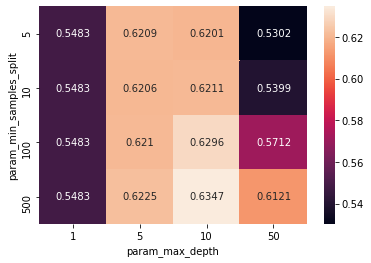

In [79]:
##TFIDF sns PLOT


#results = pd.DataFrame.from_dict(rand_search_cv.cv_results_)

max_scores = results.groupby(['param_min_samples_split', 'param_max_depth']).max()
max_scores = max_scores.unstack()[['mean_test_score', 'mean_train_score']]
sns.heatmap(max_scores.mean_test_score, annot=True, fmt='.4g');


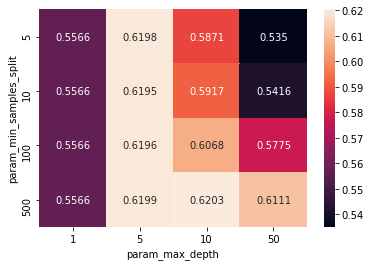

In [80]:
#AVG W2V TFIDF GRAPH PLOT


max_scores1 = results1.groupby(['param_min_samples_split', 'param_max_depth']).max()
max_scores1 = max_scores1.unstack()[['mean_test_score', 'mean_train_score']]
sns.heatmap(max_scores1.mean_test_score, annot=True, fmt='.4g');

In [81]:
#TFIDF GRAPH PLOT


trace1 = go.Scatter3d(x=sam_split_k,y=depth_k,z=train_auc, name = 'train')
trace2 = go.Scatter3d(x=sam_split_k,y=depth_k,z=test_auc, name = 'Cross validation')
data = [trace1, trace2]

layout = go.Layout(scene = dict(
        xaxis = dict(title='split'),
        yaxis = dict(title='max_depth'),
        zaxis = dict(title='AUC'),))

fig = go.Figure(data=data, layout=layout)
offline.iplot(fig, filename='3d-scatter-colorscale')

In [82]:
#AVERAGE W2V TFIDF GRAPH PLOT

trace1 = go.Scatter3d(x=sam_split_k1,y=depth_k1,z=train_auc1, name = 'train')
trace2 = go.Scatter3d(x=sam_split_k1,y=depth_k1,z=test_auc1, name = 'Cross validation')
data = [trace1, trace2]

layout = go.Layout(scene = dict(
        xaxis = dict(title='split'),
        yaxis = dict(title='max_depth'),
        zaxis = dict(title='AUC'),))

fig = go.Figure(data=data, layout=layout)
offline.iplot(fig, filename='3d-scatter-colorscale')

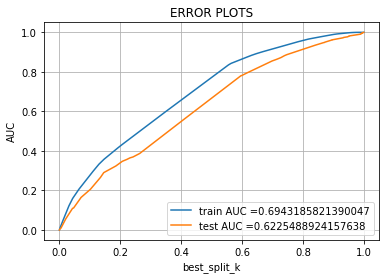

In [83]:
#TFIDF CALCULATION


best_split_k=500
best_depth_k=10
best_estimate=DecisionTreeClassifier(min_samples_split=best_split_k,max_depth=best_depth_k)
best_estimate.fit(X_tr,y_train)


train_o=best_estimate.predict_proba(X_tr)
test_o=best_estimate.predict_proba(X_te)

#print(train_o[:,1])

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, train_o[:,1])
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, test_o[:,1])

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("best_split_k")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

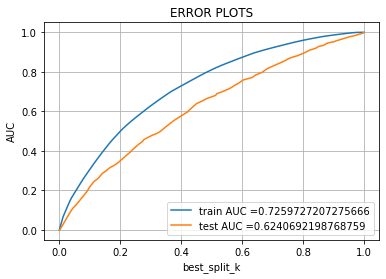

In [85]:
#AVERAGE W2V TFIDF CALCULATION

best_split_k=500
best_depth_k=10
best_estimate1=DecisionTreeClassifier(min_samples_split=best_split_k,max_depth=best_depth_k)
best_estimate1.fit(X_tr1,y_train)
train_o1=best_estimate1.predict_proba(X_tr1)
test_o1=best_estimate1.predict_proba(X_te1)
train_fpr1, train_tpr1, tr_thresholds1 = roc_curve(y_train, train_o1[:,1])
test_fpr1, test_tpr1, te_thresholds1 = roc_curve(y_test, test_o1[:,1])

plt.plot(train_fpr1, train_tpr1, label="train AUC ="+str(auc(train_fpr1, train_tpr1)))
plt.plot(test_fpr1, test_tpr1, label="test AUC ="+str(auc(test_fpr1, test_tpr1)))
plt.legend()
plt.xlabel("best_split_k")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [106]:
from sklearn.metrics import confusion_matrix

def find_best_threshold(threshould, fpr, tpr):
    t = threshould[np.argmax(tpr*(1-fpr))]
    
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3),'\n')
    return t
def predict_with_best_t(proba, threshould):
    predictions = []
    for i in proba:
        if i>=threshould:
            predictions.append(1)
        else:
            predictions.append(0)
    
    return predictions

best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
print("Train confusion matrix -tfidf")
print(confusion_matrix(y_train, predict_with_best_t(train_o[:,1], best_t)))
print("Test confusion matrix -tfidf")
print(confusion_matrix(y_test, predict_with_best_t(test_o[:,1], best_t)))


best_t1 = find_best_threshold(tr_thresholds1, train_fpr1, train_tpr1)
print("Train confusion matrix -Avg w2v tfidf")
print(confusion_matrix(y_train, predict_with_best_t(train_o1[:,1], best_t)))
print("Test confusion matrix -Avg w2v tfidf")
print(confusion_matrix(y_test, predict_with_best_t(test_o1[:,1], best_t)))




the maximum value of tpr*(1-fpr) 0.38979092118598074 for threshold 0.859 

Train confusion matrix -tfidf
[[ 3492  1873]
 [11286 16849]]
Test confusion matrix -tfidf
[[1564 1078]
 [6117 7741]]
the maximum value of tpr*(1-fpr) 0.44387050121642574 for threshold 0.848 

Train confusion matrix -Avg w2v tfidf
[[ 3792  1573]
 [10668 17467]]
Test confusion matrix -Avg w2v tfidf
[[1651  991]
 [6197 7661]]


In [87]:

test_predicted= predict_with_best_t(test_o[:,1], best_t)

count=0
fp_indices=[]
for i in range(len(y_test)):
    if (y_test[i]==0) & (test_predicted[i]==1):
        count+=1
        fp_indices.append(i)
print(count,len(fp_indices))


test_avgw2v= predict_with_best_t(test_o1[:,1], best_t)

count=0
fp_indices_avgw2v=[]
for i in range(len(y_test)):
    if (y_test[i]==0) & (test_avgw2v[i]==1):
        count+=1
        fp_indices_avgw2v.append(i)
print(count,len(fp_indices_avgw2v))


1078 1078
991 991


<class 'pandas.core.series.Series'>
16500
174905
TFIDF WORDCLOUD


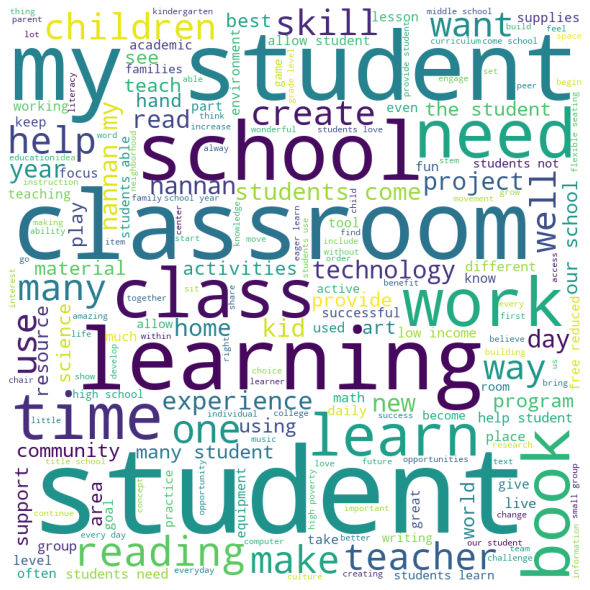

In [108]:
from wordcloud import WordCloud, STOPWORDS 
test_data=X_test['essay']
print(type(test_data))
#print(test_data[0])

data_extract=[]
for sentence in test_data:
    data_extract.append(sentence)

print(len(data_extract))    
 
word_set=[]
for i in (fp_indices):
    for word in data_extract[i].split():
        word_set.append(str(word))
        #print(comment_words)
print(len(word_set))

listToStr = ' '.join(map(str,word_set)) 
wordcloud = WordCloud(width = 800, height = 800,background_color ='white',min_font_size = 10).generate(listToStr)

print('TFIDF WORDCLOUD')

plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 





144888
AVG W2V TFIDF WORDCLOUD


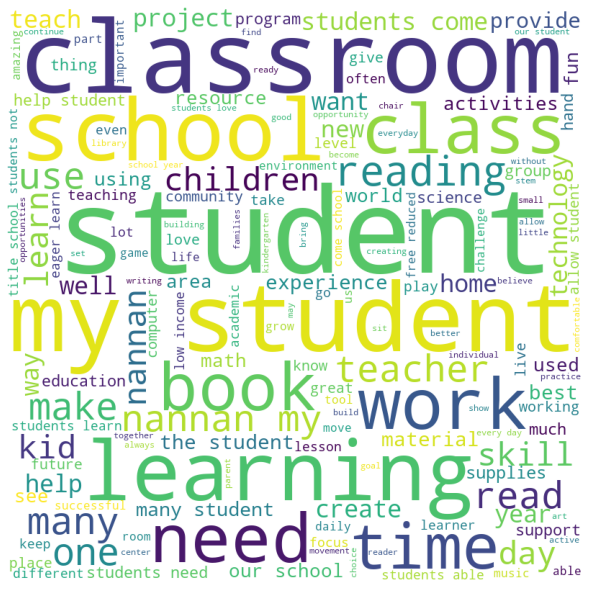

In [109]:
word_set_avgw2v=[]
for i in (fp_indices_avgw2v):
    for word in data_extract[i].split():
        word_set_avgw2v.append(str(word))
        
print(len(word_set_avgw2v))

listToStr_w2v = ' '.join(map(str,word_set_avgw2v)) 
wordcloud = WordCloud(width = 800, height = 800,background_color ='white',min_font_size = 10).generate(listToStr_w2v)

print('AVG W2V TFIDF WORDCLOUD')

plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0)

1078 1078


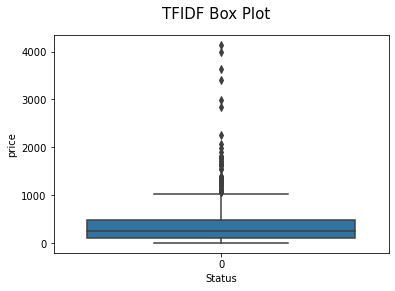

In [112]:
price_set_x=X_test['price'].iloc[fp_indices]

price_set_y=y_test[fp_indices]
print(len(price_set_y),len(price_set_x))


list_of_tuples = list(zip(price_set_x, price_set_y)) 
DF_price=pd.DataFrame(list_of_tuples, columns = ['price', 'Status']) 


sns.boxplot(x='Status',y='price',data=DF_price)
plt.suptitle('TFIDF Box Plot',fontsize=15)
plt.show()




991 991
AVG W2V TFIDF BOX PLOT


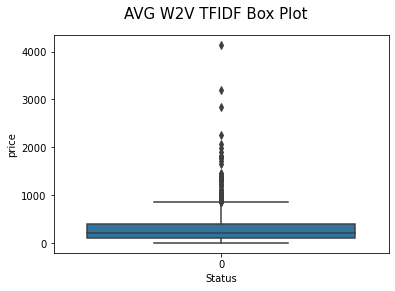

In [113]:

price_set_x_w2v=X_test['price'].iloc[fp_indices_avgw2v]

price_set_y_w2v=y_test[fp_indices_avgw2v]
print(len(price_set_x_w2v),len(price_set_y_w2v))

print('AVG W2V TFIDF BOX PLOT')
list_of_tuples_w2v = list(zip(price_set_x_w2v, price_set_y_w2v)) 
DF_price_w2v=pd.DataFrame(list_of_tuples_w2v,columns = ['price', 'Status']) 


sns.boxplot(x='Status',y='price',data=DF_price_w2v)
plt.suptitle('AVG W2V TFIDF Box Plot',fontsize=15)
plt.show()


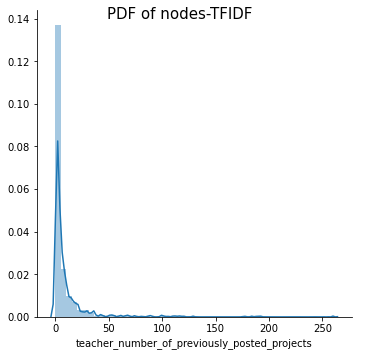

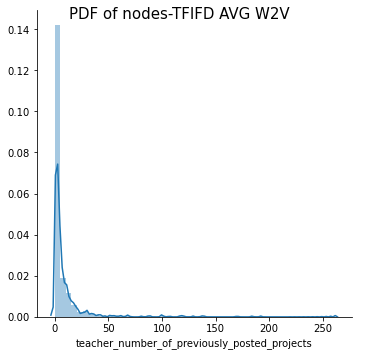

In [90]:
#https://www.geeksforgeeks.org/different-ways-to-create-pandas-dataframe/

prev_proj_x=X_test['teacher_number_of_previously_posted_projects']
new_proj_x=prev_proj_x.iloc[fp_indices]
prev_proj_y=y_test[fp_indices]


list_of_tuples = list(zip(new_proj_x, prev_proj_y)) 
DF=pd.DataFrame(list_of_tuples, columns = ['teacher_number_of_previously_posted_projects', 'Status']) 


sns.FacetGrid(DF, height=5) \
   .map(sns.distplot, "teacher_number_of_previously_posted_projects") \
   .add_legend();

plt.suptitle('PDF of nodes-TFIDF',fontsize=15)
plt.show();




prev_proj_x_w2v=X_test['teacher_number_of_previously_posted_projects']
new_proj_x_w2v=prev_proj_x.iloc[fp_indices_avgw2v]
prev_proj_y_w2v=y_test[fp_indices_avgw2v]


list_of_tuples_w2v = list(zip(new_proj_x_w2v, prev_proj_y_w2v)) 
DF_w2v=pd.DataFrame(list_of_tuples_w2v, columns = ['teacher_number_of_previously_posted_projects', 'Status']) 


sns.FacetGrid(DF_w2v, height=5) \
   .map(sns.distplot, "teacher_number_of_previously_posted_projects") \
   .add_legend();

plt.suptitle('PDF of nodes-TFIFD AVG W2V',fontsize=15)
plt.show();


Select all the features which are having non-zero feature importance.You can get the feature importance using 'feature_importances_` (https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html), discard the all other remaining features and then apply any of the model of you choice i.e. (Dession tree, Logistic Regression, Linear SVM).
You need to do hyperparameter tuning corresponding to the model you selected and procedure in step 2 and step 3
Note: when you want to find the feature importance make sure you don't use max_depth parameter keep it None.

You need to summarize the results at the end of the notebook, summarize it in the table format

# NON ZERO FEATURES :DECISION TREE

In [91]:
imp_feature=best_estimate.feature_importances_
'''for i in range(len(imp_feature)):
    if imp_feature[i]!=0:
        print(i)  '''

indic=np.nonzero(imp_feature)
print(len(indic[0]))


Xtr_nonzero=X_tr[:,indic[0]]
Xte_nonzero=X_te[:,indic[0]]

print(type(Xtr_nonzero))

74
<class 'scipy.sparse.csr.csr_matrix'>


In [93]:
# BEST-HYPER PARAMETER CALCULATION 

params = {'max_depth': [1,5,10,50], 'min_samples_split': [5,10,100,500]}

grid_search_cv = GridSearchCV(DecisionTreeClassifier(), params,scoring='roc_auc',return_train_score=True,n_jobs=-1)
grid_search_cv.fit(Xtr_nonzero,y_train)
results = pd.DataFrame.from_dict(grid_search_cv.cv_results_)

#TFIDF BEST-HYPER PARAMETER CALCULATION 


#results = results.sort_values(['param_min_samples_split'])
print(results)
train_auc= results['mean_train_score']
print(train_auc.shape,'\n')
test_auc = results['mean_test_score'] 

depth_k=results['param_max_depth']

sam_split_k=results['param_min_samples_split']

print(grid_search_cv.best_estimator_)



    mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.057247      0.001852         0.004589        0.000796   
1        0.053256      0.001620         0.004189        0.000977   
2        0.063231      0.006543         0.004987        0.001091   
3        0.060639      0.011272         0.004387        0.000490   
4        0.229587      0.023017         0.005784        0.001717   
5        0.222205      0.022188         0.006186        0.002393   
6        0.221806      0.018949         0.004787        0.000746   
7        0.248731      0.032822         0.005588        0.002243   
8        0.565488      0.040245         0.006981        0.003512   
9        0.547934      0.022694         0.005185        0.000745   
10       0.506046      0.050409         0.008180        0.006896   
11       0.462562      0.025288         0.004588        0.000489   
12       2.989800      0.044561         0.008781        0.003654   
13       2.913406      0.067615         0.008178

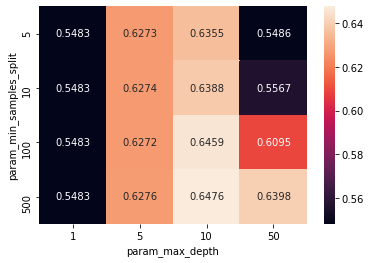

In [94]:

max_scores = results.groupby(['param_min_samples_split', 'param_max_depth']).max()
max_scores = max_scores.unstack()[['mean_test_score', 'mean_train_score']]
sns.heatmap(max_scores.mean_test_score, annot=True, fmt='.4g');


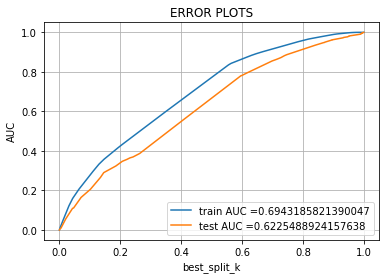

In [100]:


#TFIDF CALCULATION


best_split_k=500
best_depth_k=10
best_estimate=DecisionTreeClassifier(min_samples_split=best_split_k,max_depth=best_depth_k)
best_estimate.fit(Xtr_nonzero,y_train)


train_o=best_estimate.predict_proba(Xtr_nonzero)
test_o=best_estimate.predict_proba(Xte_nonzero)

#print(train_o[:,1])

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, train_o[:,1])
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, test_o[:,1])

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("best_split_k")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [101]:

from sklearn.metrics import confusion_matrix

def find_best_threshold(threshould, fpr, tpr):
    t = threshould[np.argmax(tpr*(1-fpr))]
    
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3),'\n')
    return t
def predict_with_best_t(proba, threshould):
    predictions = []
    for i in proba:
        if i>=threshould:
            predictions.append(1)
        else:
            predictions.append(0)
    
    return predictions

best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
print("Train confusion matrix -tfidf")
print(confusion_matrix(y_train, predict_with_best_t(train_o[:,1], best_t)))
print("Test confusion matrix -tfidf")
print(confusion_matrix(y_test, predict_with_best_t(test_o[:,1], best_t)))




the maximum value of tpr*(1-fpr) 0.38979092118598074 for threshold 0.859 

Train confusion matrix -tfidf
[[ 3492  1873]
 [11286 16849]]
Test confusion matrix -tfidf
[[1564 1078]
 [6117 7741]]


In [102]:

test_predicted= predict_with_best_t(test_o[:,1], best_t)

count=0
fp_indices=[]
for i in range(len(y_test)):
    if (y_test[i]==0) & (test_predicted[i]==1):
        count+=1
        fp_indices.append(i)
print(count,len(fp_indices))



1078 1078


16500
174905


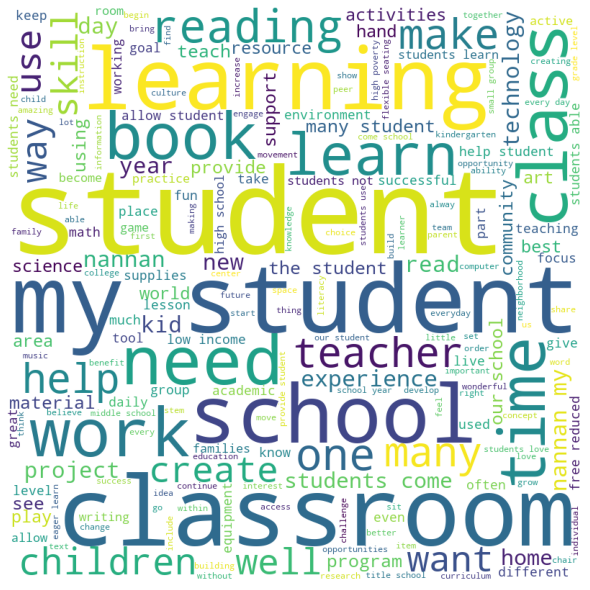

In [103]:

from wordcloud import WordCloud, STOPWORDS 
test_data=X_test['essay']
#print(test_data[0])

data_extract=[]
for sentence in test_data:
    data_extract.append(sentence)

print(len(data_extract))    
 
word_set=[]
for i in (fp_indices):
    for word in data_extract[i].split():
        word_set.append(str(word))
        #print(comment_words)
print(len(word_set))

listToStr = ' '.join(map(str,word_set)) 
wordcloud = WordCloud(width = 800, height = 800,background_color ='white',min_font_size = 10).generate(listToStr)

plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

1078 1078


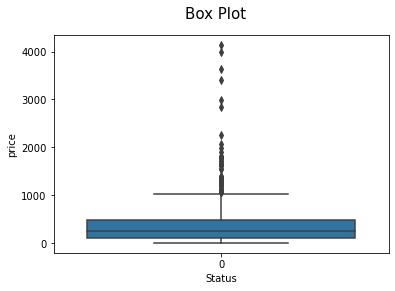

In [104]:

price_set_x=X_test['price'].iloc[fp_indices]

price_set_y=y_test[fp_indices]
print(len(price_set_y),len(price_set_x))


list_of_tuples = list(zip(price_set_x, price_set_y)) 
DF_price=pd.DataFrame(list_of_tuples, columns = ['price', 'Status']) 


sns.boxplot(x='Status',y='price',data=DF_price)
plt.suptitle('Box Plot',fontsize=15)
plt.show()



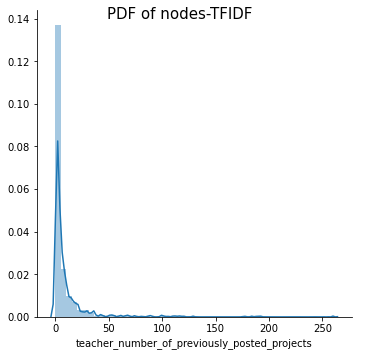

In [105]:

prev_proj_x=X_test['teacher_number_of_previously_posted_projects']
new_proj_x=prev_proj_x.iloc[fp_indices]
prev_proj_y=y_test[fp_indices]


list_of_tuples = list(zip(new_proj_x, prev_proj_y)) 
DF=pd.DataFrame(list_of_tuples, columns = ['teacher_number_of_previously_posted_projects', 'Status']) 


sns.FacetGrid(DF, height=5) \
   .map(sns.distplot, "teacher_number_of_previously_posted_projects") \
   .add_legend();

plt.suptitle('PDF of nodes-TFIDF',fontsize=15)
plt.show();

In [2]:
from tabulate import tabulate
head=['Vectorizer','Model','Best depth','Best sample split','AUC']
mydata=[('TFIDF','DT','10','500','0.622'),
        ('W2v-TFIDF','DT','10','500','0.624'),
        ('Non-zero-TFIDF','DT','10','500','0.622')]

print(tabulate(mydata,headers=head,tablefmt="grid"))

+----------------+---------+--------------+---------------------+-------+
| Vectorizer     | Model   |   Best depth |   Best sample split |   AUC |
+================+=========+==============+=====================+=======+
| TFIDF          | DT      |           10 |                 500 | 0.622 |
+----------------+---------+--------------+---------------------+-------+
| W2v-TFIDF      | DT      |           10 |                 500 | 0.624 |
+----------------+---------+--------------+---------------------+-------+
| Non-zero-TFIDF | DT      |           10 |                 500 | 0.622 |
+----------------+---------+--------------+---------------------+-------+
